In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data_2 = pd.read_excel(r"C:\Users\Shubham Dandak\Downloads\Supplychain train dataset.xlsx")

In [3]:
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [8]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

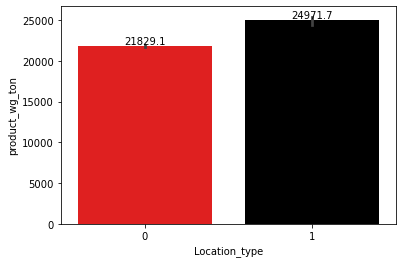

In [48]:
color = ['red','black','blue','green','orange','yellow']
p = sns.barplot(x='Location_type',y='product_wg_ton', data=data, palette=color)
show_values(p) 

In [18]:
data['Location_type'] = data['Location_type'].map({'Rural':0,'Urban':1})

In [23]:
data_location_1 = data[['Location_type','product_wg_ton']]

In [31]:
data_location_2 = data_1[data_1['Location_type']=='Urban']
data_location_2['Location_type'] = data_location_2['Location_type'].map({'Urban':1})

C:\Users\Shubham Dandak\AppData\Local\Temp\ipykernel_8460\1154155829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_location_2['Location_type'] = data_location_2['Location_type'].map({'Urban':1})


In [32]:
stat, p = pearsonr(data_location_2['Location_type'],data_location_2['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

Stats = nan and p value is nan
product weight tonne is dependent on Location_type


C:\Users\Shubham Dandak\anaconda3\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [33]:
data_location_2

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
12,WH_100012,EID_50012,1,Mid,North,Zone 2,4,0,3,5012,...,0,95,28.0,2022.0,4,0,B+,1,1,5124
24,WH_100024,EID_50024,1,Large,West,Zone 5,1,0,4,5670,...,1,140,31.0,NaN,12,0,C,2,14,15125
45,WH_100045,EID_50045,1,Large,West,Zone 5,7,0,3,5667,...,1,220,38.0,2015.0,21,1,A+,3,14,31113
49,WH_100049,EID_50049,1,Large,South,Zone 5,3,0,3,3700,...,1,196,26.0,2000.0,31,1,A+,5,10,44116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22097,WH_122097,EID_72097,1,Large,North,Zone 6,0,0,3,4304,...,1,93,28.0,NaN,34,0,B,6,6,41078
22104,WH_122104,EID_72104,1,Small,North,Zone 1,2,2,2,5169,...,1,222,33.0,NaN,23,0,A+,3,3,29064
22134,WH_122134,EID_72134,1,Large,North,Zone 6,1,0,3,3837,...,1,87,25.0,NaN,12,0,A+,6,28,18114
22135,WH_122135,EID_72135,1,Large,South,Zone 5,8,0,4,4312,...,0,194,21.0,2014.0,19,1,A,2,25,26114


In [42]:
data_1.sample(30)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
14887,WH_114887,EID_64887,Rural,Mid,South,Zone 4,5,0,2,5369,...,1,266,30.0,2017.0,10,1,C,6,26,15061
7836,WH_107836,EID_57836,Rural,Large,North,Zone 6,1,3,3,4770,...,0,146,23.0,NaN,16,0,A,4,6,20113
13591,WH_113591,EID_63591,Urban,Small,South,Zone 1,3,0,3,4936,...,0,200,18.0,2003.0,25,0,C,6,16,31131
1847,WH_101847,EID_51847,Rural,Large,North,Zone 6,0,4,2,4607,...,1,127,34.0,NaN,5,0,B,1,28,6133
3808,WH_103808,EID_53808,Rural,Large,North,Zone 6,1,0,3,4574,...,1,113,42.0,NaN,13,0,B+,4,28,15105
7679,WH_107679,EID_57679,Rural,Small,South,Zone 1,6,0,3,8001,...,0,244,43.0,2019.0,5,0,B,3,21,5098
2462,WH_102462,EID_52462,Rural,Large,North,Zone 6,0,0,2,3824,...,1,156,NaN,NaN,24,0,B,3,28,31123
11146,WH_111146,EID_61146,Rural,Mid,West,Zone 2,2,0,3,4259,...,1,132,37.0,NaN,6,0,B+,2,18,7131
5201,WH_105201,EID_55201,Rural,Mid,East,Zone 4,6,3,5,4661,...,1,131,26.0,NaN,14,0,B+,4,26,16144
11906,WH_111906,EID_61906,Rural,Mid,West,Zone 3,7,5,3,4336,...,1,144,21.0,NaN,17,1,A+,5,19,23076


In [41]:
data_LT

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
21095,WH_121095,EID_71095,Rural,Mid,North,Zone 4,7,0,3,4818,...,0,79,30.0,1999.0,35,1,A+,6,26,49111
21466,WH_121466,EID_71466,Rural,Large,West,Zone 5,0,1,3,4535,...,0,234,43.0,NaN,18,0,C,5,14,22079
12205,WH_112205,EID_62205,Rural,Small,North,Zone 6,8,1,4,4910,...,0,256,18.0,2006.0,25,0,A,3,8,32111
7958,WH_107958,EID_57958,Rural,Large,North,Zone 5,6,0,3,4673,...,1,210,23.0,2018.0,6,1,C,3,17,7063
13969,WH_113969,EID_63969,Rural,Mid,North,Zone 3,2,0,2,4873,...,0,139,NaN,NaN,25,0,C,3,19,32144
15285,WH_115285,EID_65285,Rural,Large,South,Zone 5,5,2,3,7497,...,1,250,35.0,NaN,16,0,A,6,14,20141
11876,WH_111876,EID_61876,Rural,Mid,South,Zone 3,4,0,2,4539,...,1,149,30.0,1998.0,26,1,C,2,27,35146
21484,WH_121484,EID_71484,Rural,Large,North,Zone 5,0,0,2,5273,...,1,123,39.0,NaN,7,0,C,3,17,9128
20756,WH_120756,EID_70756,Rural,Mid,West,Zone 3,6,0,4,4787,...,0,249,36.0,2021.0,0,0,NaN,0,27,5102
20863,WH_120863,EID_70863,Rural,Mid,North,Zone 2,0,0,4,5610,...,0,148,17.0,NaN,6,0,A,1,12,8139


In [44]:
data_LT['Location_type'] = data_LT['Location_type'].map({'Rural':0,'Urban':1})

In [45]:
stat, p = pearsonr(data_LT['Location_type'],data_LT['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

Stats = 0.12376927278290854 and p value is 0.5146466773076064
product weight tonne is independent from Location_type


In [46]:
data_1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


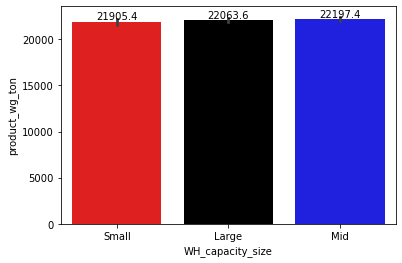

In [49]:
p = sns.barplot(x='WH_capacity_size',y='product_wg_ton', data=data_1,palette=color)
show_values(p)

In [50]:
data_1['WH_capacity_size'] = data['WH_capacity_size'].map({'Small':0,'Mid':1,'Large':2})

In [51]:
stat, p = pearsonr(data_1['WH_capacity_size'],data_1['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

Stats = 0.0029668568424028622 and p value is 0.6588295798901679
product weight tonne is independent from Location_type


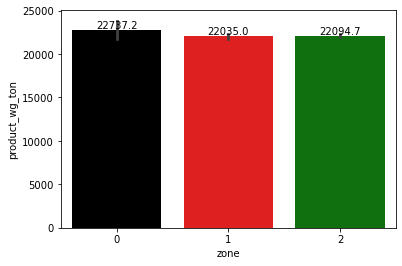

In [56]:
color = ['black','red','green','orange','yellow']
p = sns.barplot(x='zone',y='product_wg_ton', data=data_1,palette=color)
show_values(p)

In [59]:
data_1['zone'] = data['zone'].map({'East':0,'West':1,'North':2,'South':3})

In [60]:
stat, p = pearsonr(data_1['zone'],data_1['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

Stats = -0.005754436438456601 and p value is 0.3917851902337272
product weight tonne is independent from Location_type


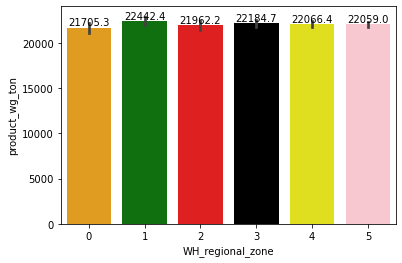

In [64]:
color = ['orange','green','red','black','yellow','pink']
p = sns.barplot(x='WH_regional_zone',y='product_wg_ton', data=data_1,palette=color)
show_values(p)

In [61]:
data_1['WH_regional_zone'] = data['WH_regional_zone'].map({'Zone 1':0,'Zone 2':1,'Zone 3':2,'Zone 4':3,'Zone 5':4,'Zone 6':5})

In [62]:
stat, p = pearsonr(data_1['WH_regional_zone'],data_1['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

Stats = 8.599371543347584e-05 and p value is 0.9897892586175275
product weight tonne is independent from Location_type


In [73]:
data_2

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,170,NaN,NaN,26,0,C,5,9,33108
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [75]:
wh_reg_zone = pd.get_dummies(data_2['WH_regional_zone'])

In [76]:
wh_reg_zone

,Zone 1,Zone 2,Zone 3,Zone 4,Zone 5,Zone 6
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
22145,0,0,0,0,0,1
22146,0,0,0,0,0,1
22147,0,0,0,0,0,1
22148,0,0,0,0,0,1


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_2['wh_reg_zone'] = le.fit_transform(data_2['WH_regional_zone'])

In [80]:
data_2

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,wh_reg_zone
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,91,29.0,NaN,13,0,A,5,15,17115,5
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,210,31.0,NaN,4,0,A,3,17,5074,4
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,161,37.0,NaN,17,0,A,6,22,23137,1
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,103,21.0,NaN,17,1,A+,3,27,22115,2
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,112,25.0,2009.0,18,0,C,6,24,24071,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,203,28.0,2007.0,22,1,A+,2,4,29138,5
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,170,NaN,NaN,26,0,C,5,9,33108,5
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,99,22.0,NaN,20,0,B+,6,4,24072,5
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,4378,...,220,17.0,NaN,13,0,B,3,28,15055,5


In [82]:
stat, p = pearsonr(data_2['wh_reg_zone'],data_2['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('product weight tonne is independent from Location_type')
else:
    print('product weight tonne is dependent on Location_type')

Stats = 8.599371543347584e-05 and p value is 0.9897892586175275
product weight tonne is independent from Location_type


In [84]:
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,1,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,0,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,0,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,0,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,0,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,0,Large,North,Zone 6,8,1,3,5030,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,WH_122146,EID_72146,0,Small,South,Zone 6,3,1,3,4320,...,0,170,NaN,NaN,26,0,C,5,9,33108
22147,WH_122147,EID_72147,0,Large,North,Zone 6,7,2,2,5268,...,0,99,22.0,NaN,20,0,B+,6,4,24072
22148,WH_122148,EID_72148,0,Large,North,Zone 6,6,2,4,4378,...,0,220,17.0,NaN,13,0,B,3,28,15055


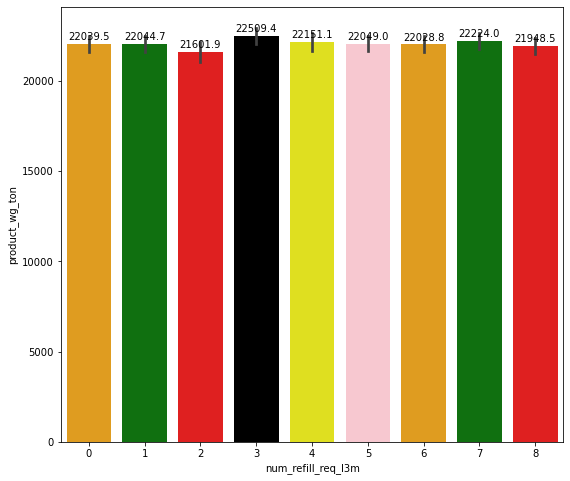

In [86]:
plt.figure(figsize=(9,8))
color = ['orange','green','red','black','yellow','pink']
p = sns.barplot(x='num_refill_req_l3m',y='product_wg_ton', data=data,palette=color)
show_values(p)

In [87]:
data['transport_issue_l1y'].value_counts()

0    13448
1     4127
2     1947
3     1633
4      680
5      315
Name: transport_issue_l1y, dtype: int64

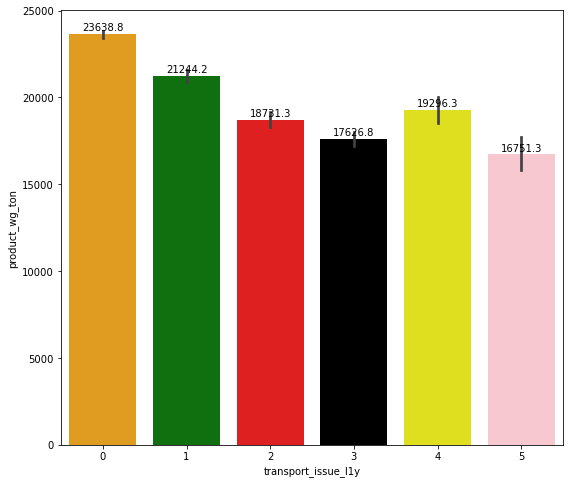

In [89]:
plt.figure(figsize=(9,8))
color = ['orange','green','red','black','yellow','pink']
p = sns.barplot(x='transport_issue_l1y',y='product_wg_ton', data=data,palette=color)
show_values(p)

In [90]:
data['Competitor_in_mkt'].value_counts()

2     7719
3     6263
4     5930
5     1120
6      493
1      372
7      167
8       68
9       10
10       6
12       1
0        1
Name: Competitor_in_mkt, dtype: int64

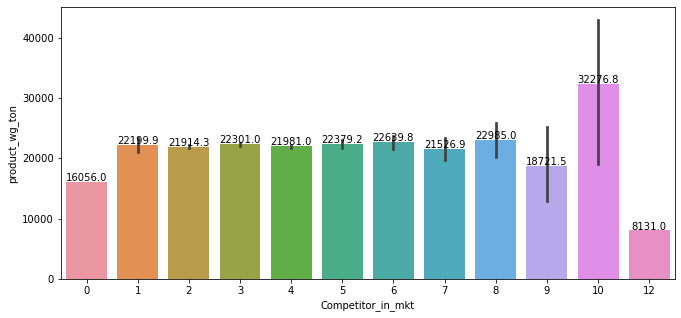

In [96]:
plt.figure(figsize=(11,5))
color = ['orange','green','red','black','yellow','pink']
p = sns.barplot(x='Competitor_in_mkt',y='product_wg_ton', data=data)
show_values(p)

In [97]:
data['retail_shop_num'].value_counts()

4808     21
4860     20
4367     20
5022     20
4850     20
         ..
7655      1
5745      1
7398      1
2683      1
10846     1
Name: retail_shop_num, Length: 4735, dtype: int64

C:\Users\Shubham Dandak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_wg_ton', ylabel='retail_shop_num'>

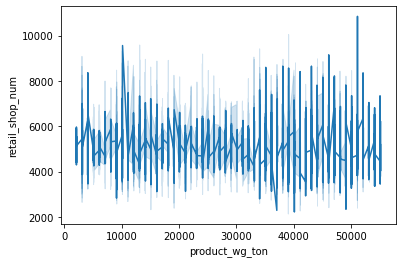

In [104]:
y = data['retail_shop_num']
x = data['product_wg_ton']

sns.lineplot(x, y)

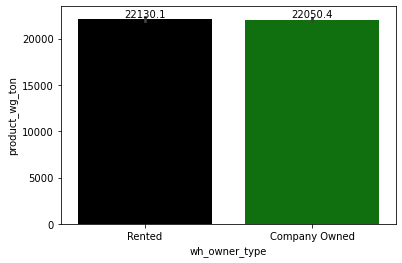

In [107]:
color = ['black','green','red','black','yellow','pink']
p = sns.barplot(x='wh_owner_type',y='product_wg_ton', data=data, palette=color)
show_values(p)

In [108]:
data_1['wh_owner_type'] = data['wh_owner_type'].map({'Rented':0,'Company Owned':1})

In [109]:
stat, p = pearsonr(data_1['wh_owner_type'],data_1['product_wg_ton'])
print('Stats = {} and p value is {}'.format(stat,p))
if p>0.05:
    print('wh_owner_type is independent from Location_type')
else:
    print('wh_owner_type is dependent on Location_type')

Stats = -0.003412204077873336 and p value is 0.6115887545073966
wh_owner_type is independent from Location_type


In [110]:
data['distributor_num'].value_counts()

21    435
29    433
31    430
37    427
40    427
28    426
69    416
41    416
42    415
48    415
63    413
24    411
47    411
56    408
35    406
36    405
59    405
38    404
23    404
44    403
49    403
33    402
50    402
64    400
65    400
55    397
22    397
54    395
43    394
27    392
20    392
62    391
30    390
52    389
18    389
32    388
70    387
15    386
46    385
58    384
26    384
16    384
57    384
39    382
67    381
61    379
45    379
34    378
51    372
25    371
66    369
17    368
53    365
19    365
60    362
68    354
Name: distributor_num, dtype: int64

C:\Users\Shubham Dandak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_wg_ton', ylabel='distributor_num'>

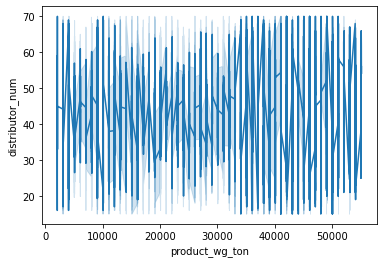

In [111]:
y = data['distributor_num']
x = data['product_wg_ton']

sns.lineplot(x, y)

C:\Users\Shubham Dandak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_wg_ton', ylabel='distributor_num'>

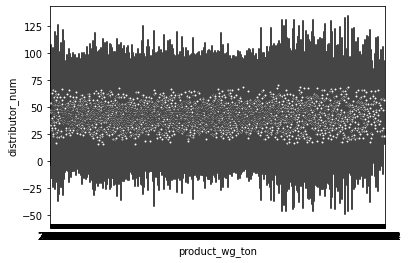

In [114]:
y = data['distributor_num']
x = data['product_wg_ton']

sns.violinplot(x, y)

In [115]:
data['distributor_num'].value_counts()

21    435
29    433
31    430
37    427
40    427
28    426
69    416
41    416
42    415
48    415
63    413
24    411
47    411
56    408
35    406
36    405
59    405
38    404
23    404
44    403
49    403
33    402
50    402
64    400
65    400
55    397
22    397
54    395
43    394
27    392
20    392
62    391
30    390
52    389
18    389
32    388
70    387
15    386
46    385
58    384
26    384
16    384
57    384
39    382
67    381
61    379
45    379
34    378
51    372
25    371
66    369
17    368
53    365
19    365
60    362
68    354
Name: distributor_num, dtype: int64

<AxesSubplot:xlabel='distributor_num', ylabel='product_wg_ton'>

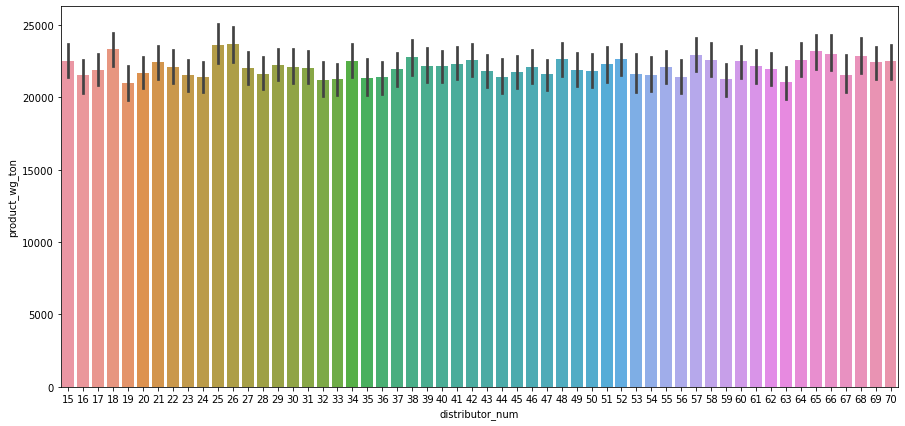

In [124]:
plt.figure(figsize=(15,7))
sns.barplot(x='distributor_num',y='product_wg_ton',data=data)


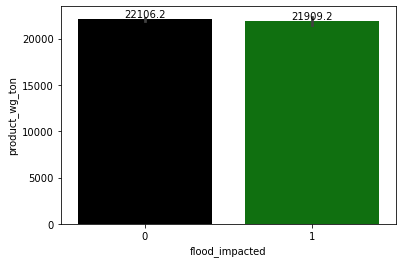

In [131]:
p = sns.barplot(x=data['flood_impacted'],y=data['product_wg_ton'],palette=color)
show_values(p)

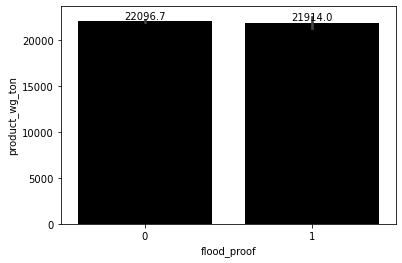

In [135]:
#colors = ['red','black']
p = sns.barplot(x=data['flood_proof'],y=data['product_wg_ton'],color='black')
show_values(p)

In [134]:
stat, p = pearsonr(data["Location_type"],data['product_wg_ton'])
print(stat,p)

0.07415828201627415 2.1562766876026297e-28


In [ ]:
data['app']